In [1]:
# Import libraries and packages
import os
import pandas as pd
import numpy as np

# Define path with .py codes containing functions used in this script
os.getcwd()
os.chdir( '../src/features')

# Import useful functions for this script  
from tracking import track
import matplotlib.pyplot as plt
os.chdir( '../models')
from F_validation import save_plot, plot_quality_metrics

track("-"*25 + "VALIDATION" + "-"*25)

ModuleNotFoundError: No module named 'pandas'

# Reading data
#### Define path to data files

In [2]:
track("Defining path to data files")

# Define base path to data files
path = '../../temp_data/'

# Define path to the model_data_with_clusters table
path_clusters_data = path + 'model_data_with_clusters.csv'

# Ensure the input file exist
assert os.path.isfile(path_clusters_data), f'{path_clusters_data} not found. Is it a file?'

#### Read the files

In [3]:
track("Reading files")

# Read clusterized data 
clusterized_data = pd.read_csv(path_clusters_data)

track("Finished reading files")

# Validation

In [4]:
track("Creating average quality dataset")
average_quality = (clusterized_data.groupby('clusters').agg(blocker_violations_mean = ('blocker_violations', 'mean'),
                                          blocker_violations_std = ('blocker_violations', 'std'),
                                          critical_violations_mean = ('critical_violations', 'mean'),
                                          critical_violations_std = ('critical_violations', 'std'),
                                          major_violations_mean = ('major_violations', 'mean'),
                                          major_violations_std = ('major_violations', 'std'),
                                          minor_violations_mean = ('minor_violations', 'mean'),
                                          minor_violations_std = ('minor_violations', 'std'),
                                          code_smells_mean = ('code_smells', 'mean'),
                                          code_smells_std = ('code_smells', 'std'),
                                          bugs_mean = ('bugs', 'mean'),
                                          bugs_std = ('bugs', 'std'),
                                          vulnerabilities_mean = ('vulnerabilities', 'mean'),
                                          vulnerabilities_std = ('vulnerabilities', 'std'),
                                          blocker_mean = ('blocker', 'mean'),
                                          blocker_std = ('blocker', 'std'),
                                          critical_mean = ('critical', 'mean'),
                                          critical_std = ('critical', 'std'),
                                          major_mean = ('major', 'mean'),
                                          major_std = ('major', 'std'),
                                          minor_mean = ('minor', 'mean'),
                                          minor_std = ('minor', 'std'))).reset_index()
track("Finished creating average quality dataset")

In [5]:
track("Creating quality rating")
quality_rating_data = clusterized_data.groupby('clusters').agg({
    'violations': 'sum',
                            'blocker_violations': 'sum',
                            'critical_violations': 'sum',
                            'major_violations': 'sum',
                            'minor_violations': 'sum',
                            'blocker': 'sum',
                            'critical': 'sum',
                            'major': 'sum',
                            'minor': 'sum',
                            'code_smells': 'sum',
                            'bugs': 'sum',
                            'vulnerabilities': 'sum',
                            'sqale_debt_ratio': 'mean',
}).reset_index()



In [6]:
# Calculate ponderated mean of the violations variables
violations = quality_rating_data[["blocker_violations", "critical_violations", "major_violations", "minor_violations"]] 
violations = violations*[0.5, 0.4, 0.07, 0.03]
violations = np.sum(violations, axis=1)
# Calculate ponderated mean of the severity issues variables
severity = quality_rating_data[["blocker", "critical", "major", "minor"]]
severity = severity*[0.5, 0.4, 0.15, 0.05]
severity = np.sum(severity, axis=1)
# Add violations and severity columns in the dataset
quality_rating_data['violations'] = violations
quality_rating_data['severity'] = severity
# Discard all types of violations and severity issues columns
quality_rating_data = quality_rating_data.drop(["clusters", "blocker_violations", "critical_violations", "major_violations", "minor_violations", "blocker", "critical", "major", "minor"], axis=1)
quality_rating_data
# compute the mean of each cluster
quality_rating_data = quality_rating_data[["violations", "code_smells",	"bugs",	"vulnerabilities",	"severity"]]
quality_rating_data
suma = np.sum(quality_rating_data, axis=1)

total = np.sum(suma)
quality_rating = suma/total
track("Finished creating quality rating")


0    0.133628
1    0.617484
2    0.183636
3    0.033983
4    0.031269
dtype: float64

In [7]:
track("Creating plots of quality metrics")
# There will be three different plots. It is necessary to create the groups of the variables to be printed in the same plot 
violation_metrics = ["blocker_violations", "critical_violations", "major_violations", "minor_violations"]
severity_metrics = ["blocker", "critical", "major", "minor"]
other_metrics = ["code_smells", "bugs", "vulnerabilities"]

In [8]:
# Order the quality rating from the best cluster to the words one. It allows to compare the values from the cluster with highest quality rating to the lowest one.
average_quality['quality_rating'] = quality_rating
sorted_average_quality = average_quality.sort_values(by=['quality_rating'],ascending = False)

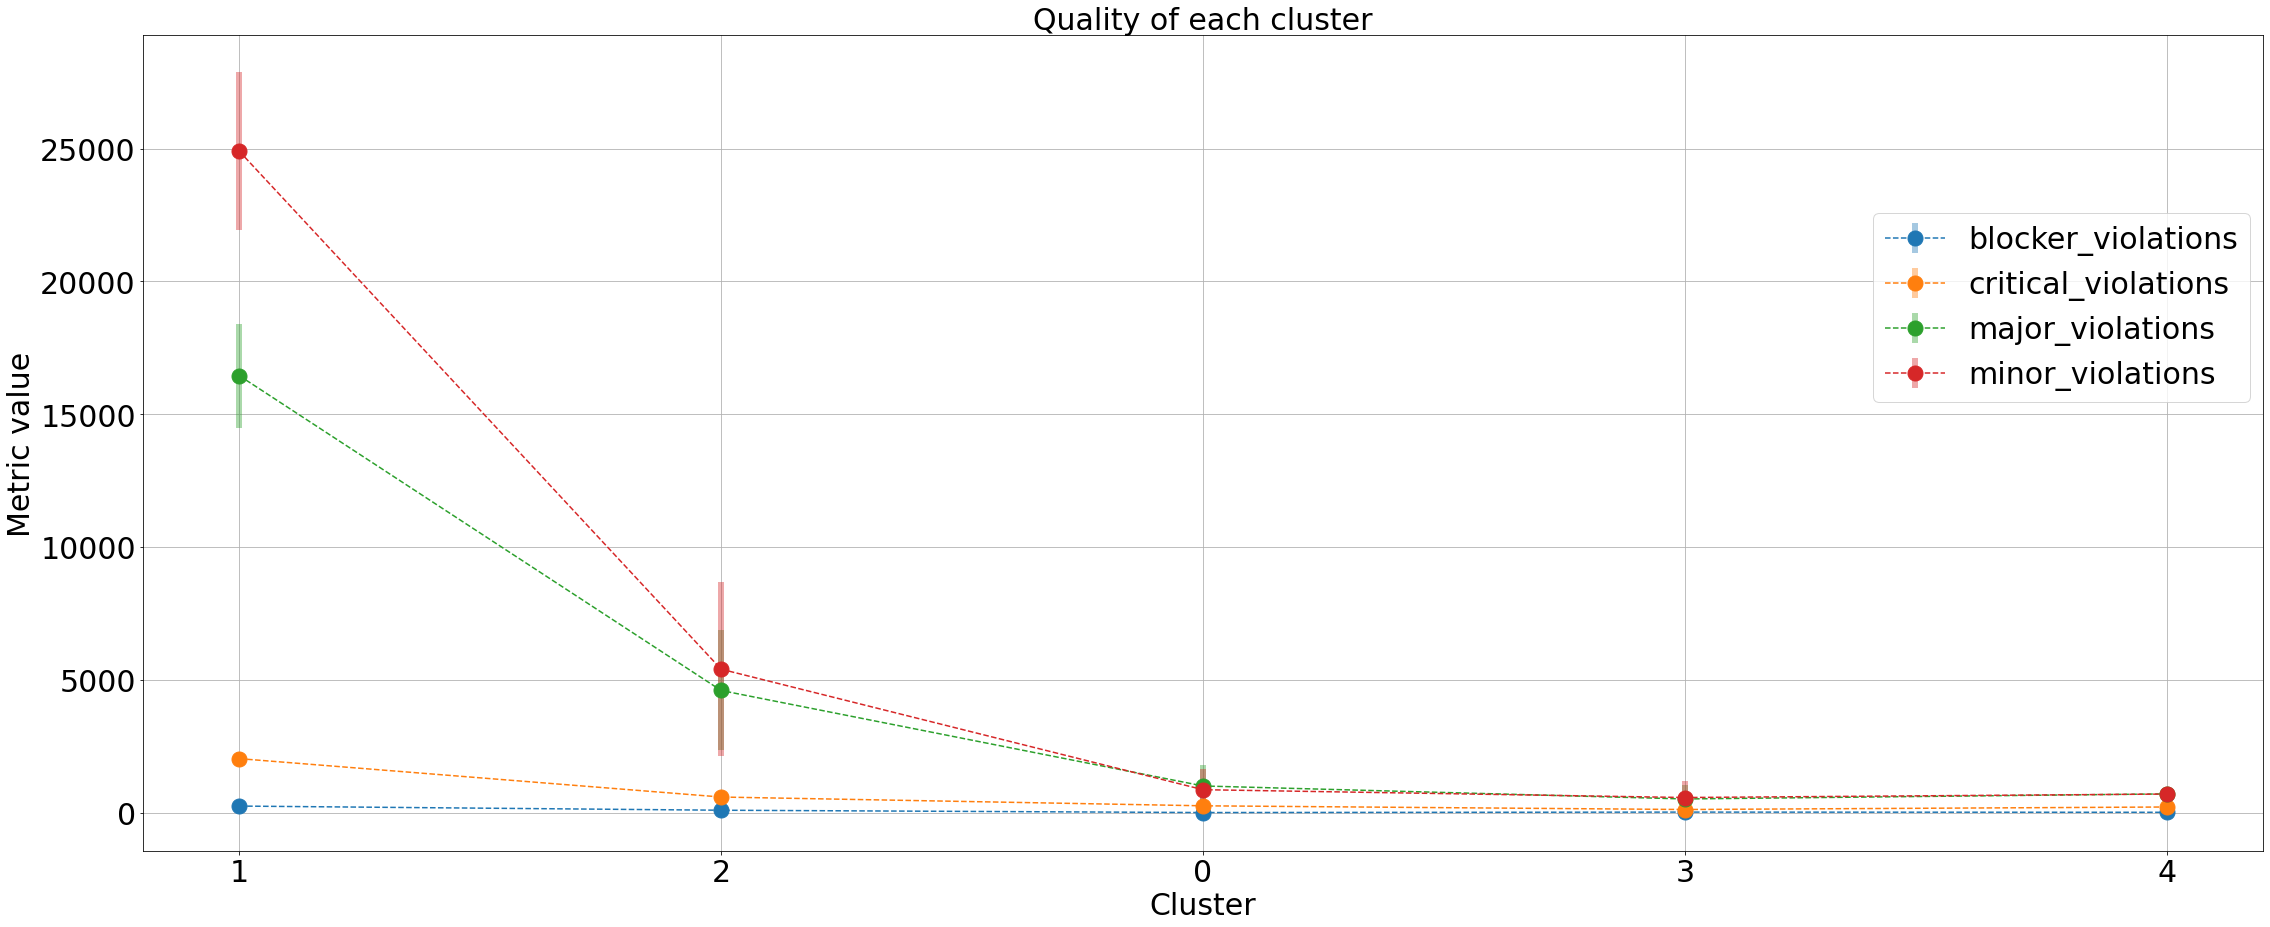

In [10]:
plot_quality_metrics(sorted_average_quality, violation_metrics, [0, 5000, 10000, 15000, 20000, 25000])

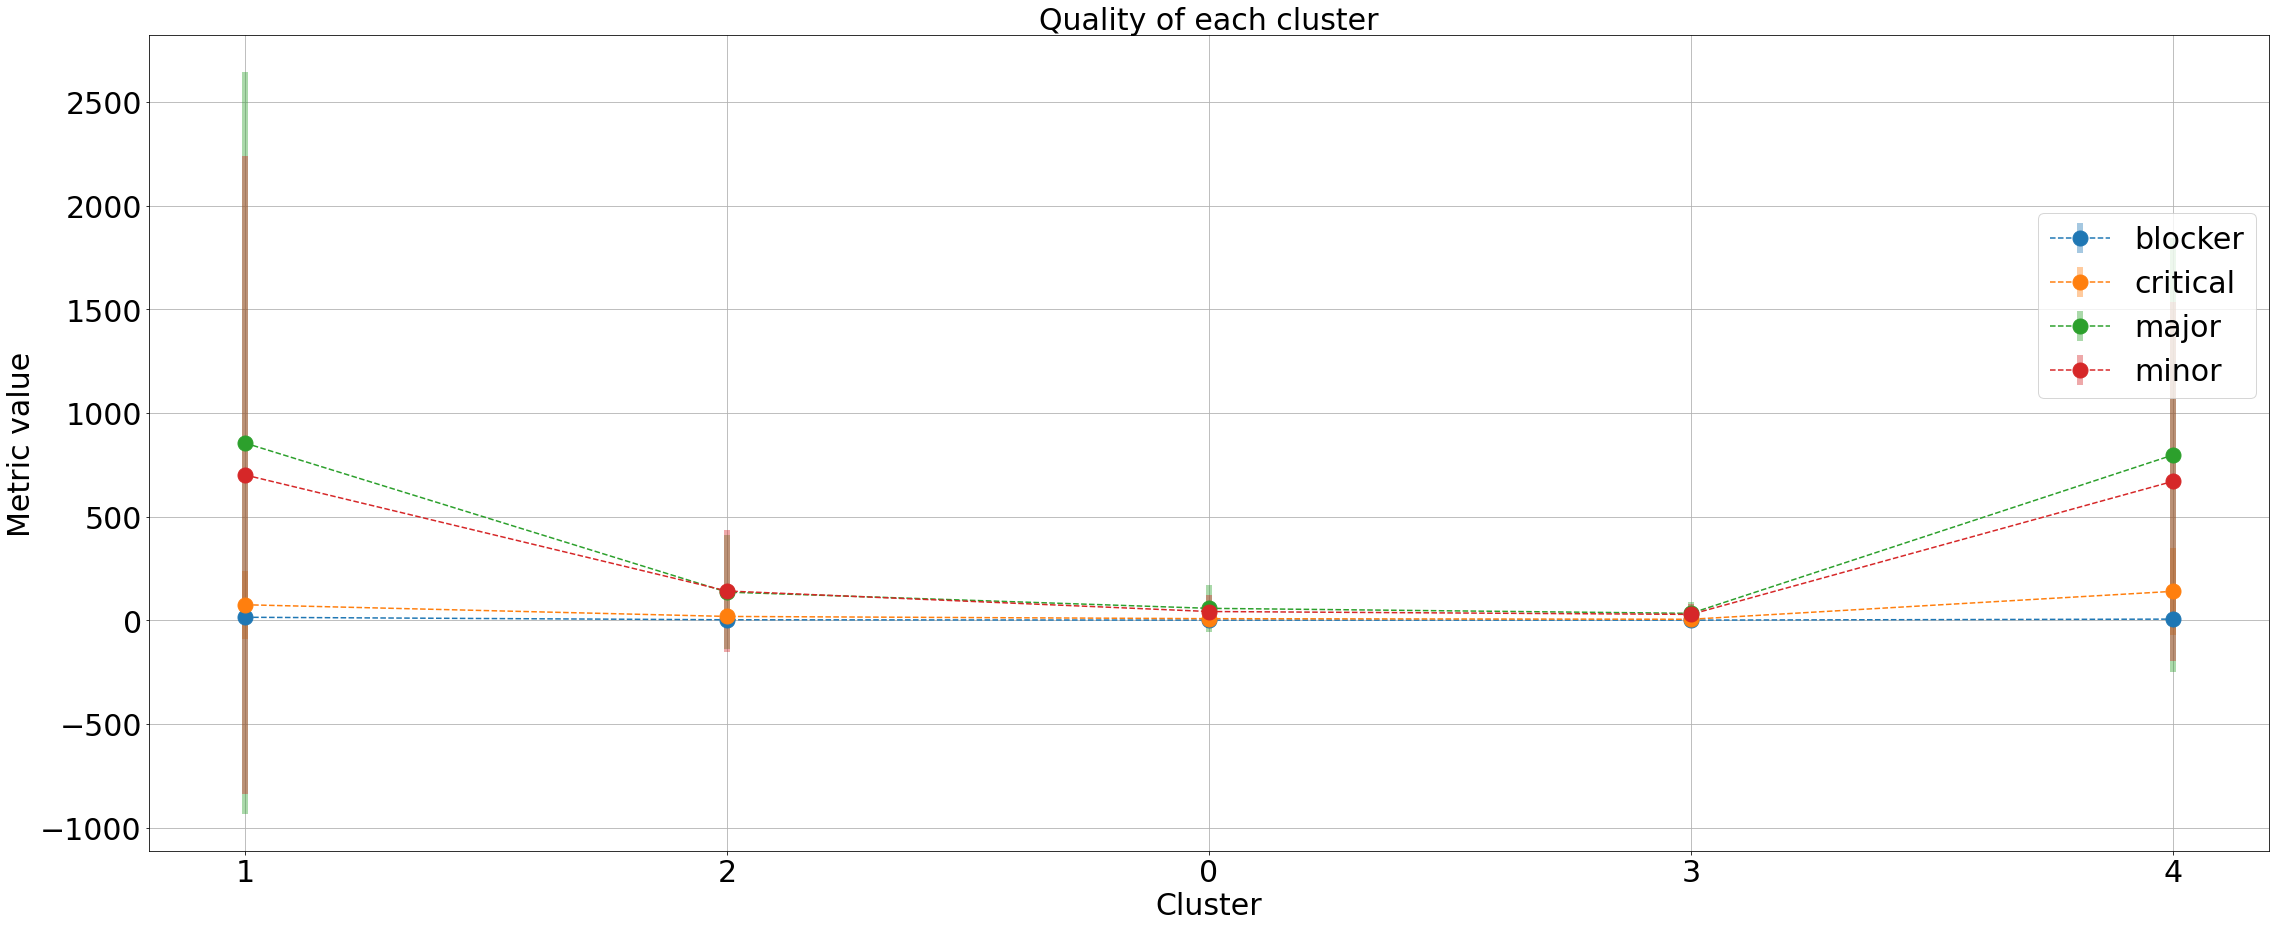

In [11]:
plot_quality_metrics(sorted_average_quality, severity_metrics, [-1000, -500, 0, 500, 1000, 1500, 2000, 2500])

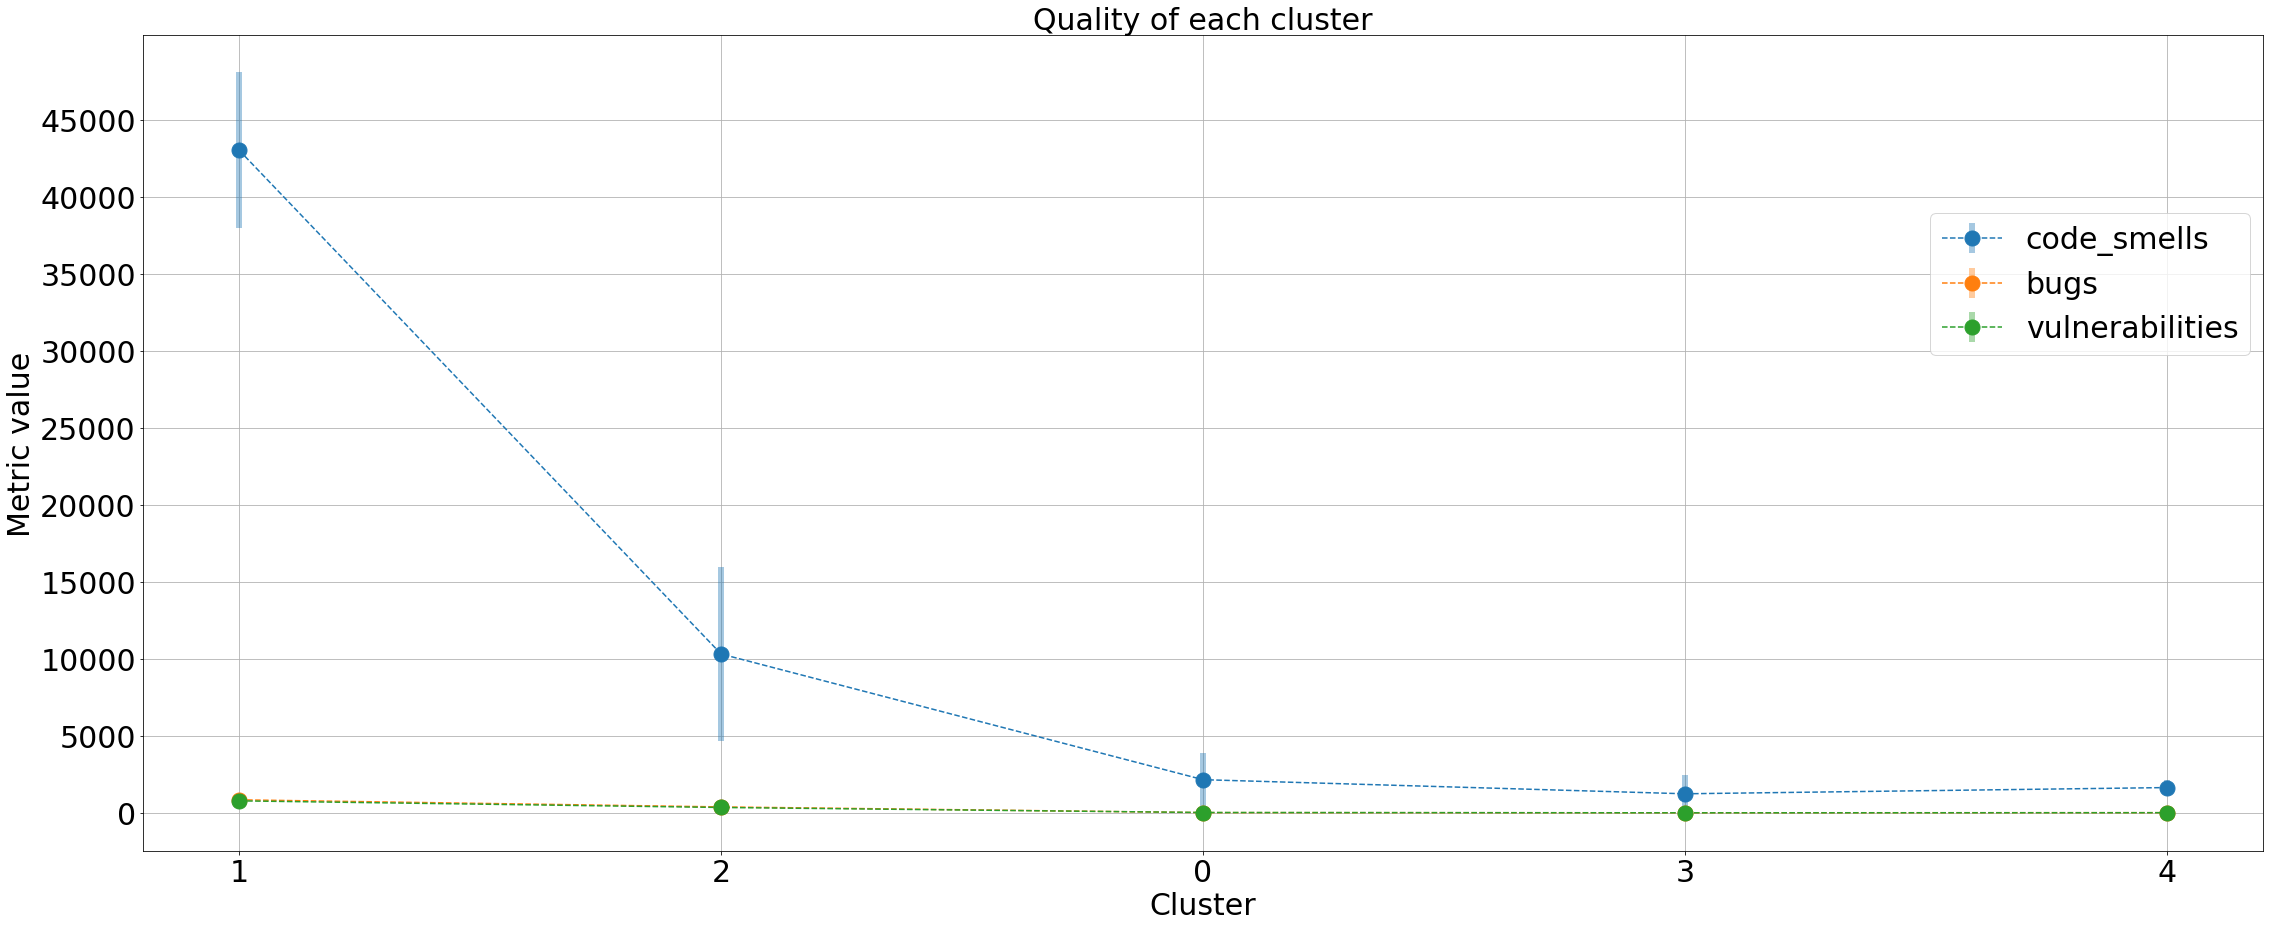

In [12]:
plot_quality_metrics(sorted_average_quality, other_metrics, [0, 5000, 10000, 15000, 20000, 25000, 30000, 35000, 40000, 45000])
track("Finished creating plots of quality metrics")